
Bitcoin Price Predictions vs Actual:
----------------------------------------
      Date  Predicted     Actual
01-04-2025 $83,672.63 $82,548.80
02-04-2025 $84,217.53 $85,164.20
03-04-2025 $84,003.00 $82,525.00
04-04-2025 $84,154.22 $83,159.40
05-04-2025 $84,430.51 $84,543.30


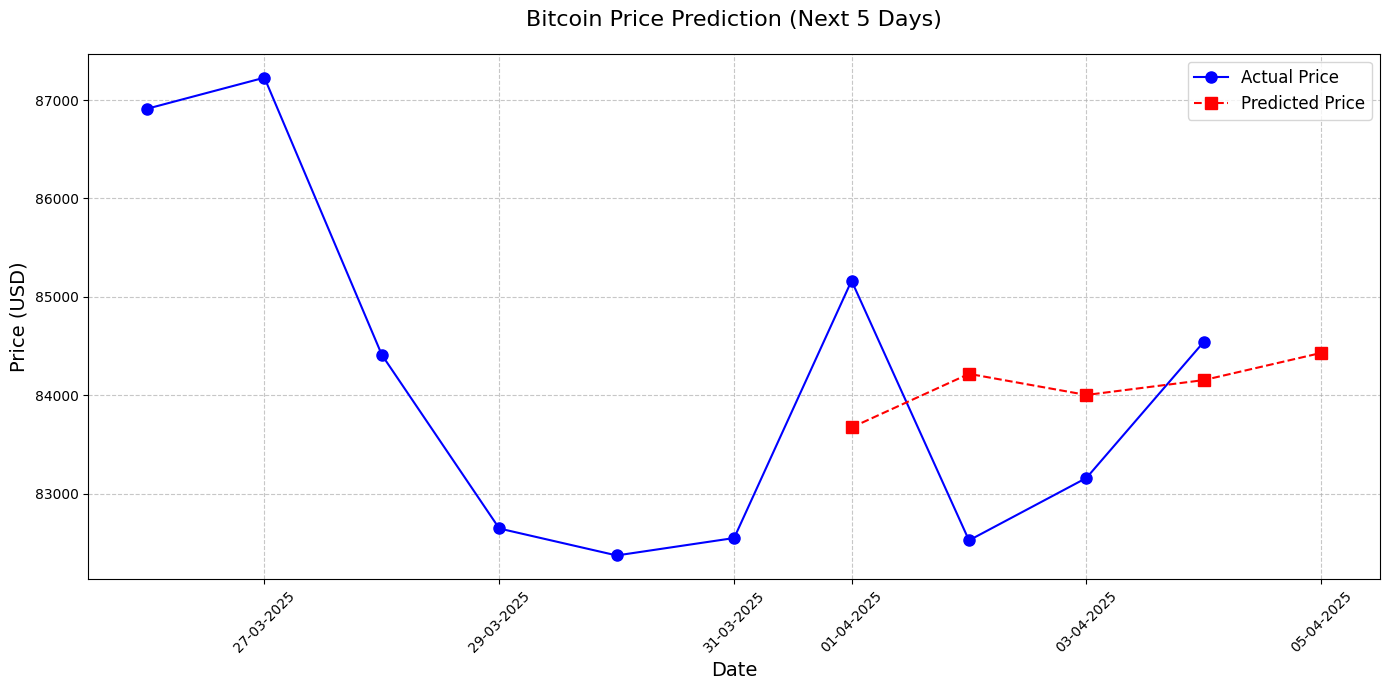

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Your exact data in a format that can be copied directly
data = """Date	Price	Open	High	Low	Vol.
04-04-2025	84,543.30	83,160.20	84,567.50	82,613.00	78.56K
03-04-2025	83,159.40	82,522.60	83,908.90	81,313.80	83.15K
02-04-2025	82,525.00	85,166.00	88,377.30	82,358.90	104.05K
01-04-2025	85,164.20	82,548.60	85,506.20	82,435.80	66.72K
31-03-2025	82,548.80	82,375.40	83,895.60	81,300.10	61.76K
30-03-2025	82,371.60	82,646.80	83,532.90	81,593.20	35.37K
29-03-2025	82,645.70	84,412.10	84,603.40	81,668.20	39.34K
28-03-2025	84,410.40	87,209.50	87,507.50	83,596.70	85.25K
27-03-2025	87,228.20	86,937.00	87,751.40	85,844.40	56.49K
26-03-2025	86,912.00	87,349.80	88,276.70	85,866.40	62.04K
25-03-2025	87,404.00	87,495.30	88,523.30	86,328.50	75.24K
24-03-2025	87,490.00	86,076.10	88,740.20	85,541.60	95.71K
23-03-2025	86,077.40	83,840.20	86,082.00	83,812.70	31.13K
22-03-2025	83,840.50	84,076.60	84,526.30	83,688.20	20.84K
21-03-2025	84,073.30	84,208.70	84,831.00	83,215.90	42.80K
20-03-2025	84,208.10	86,841.30	87,419.00	83,656.10	69.86K
19-03-2025	86,841.00	82,719.10	86,990.60	82,557.50	84.61K
18-03-2025	82,719.10	84,019.10	84,019.10	81,171.30	58.17K
17-03-2025	84,019.10	82,580.30	84,729.20	82,525.00	58.04K
16-03-2025	82,578.40	84,341.30	84,942.50	82,014.20	50.04K
15-03-2025	84,341.30	83,978.70	84,679.50	83,636.40	38.40K
14-03-2025	83,977.10	81,103.50	85,286.60	80,833.20	81.23K
13-03-2025	81,100.20	83,664.70	84,292.00	79,954.90	79.25K
12-03-2025	83,664.30	82,921.10	84,266.50	80,646.60	88.61K
11-03-2025	82,921.10	78,579.70	83,572.60	76,677.10	123.59K
10-03-2025	78,575.90	80,702.20	83,902.80	77,480.50	120.23K
09-03-2025	80,691.60	86,221.50	86,498.60	80,048.90	69.90K
08-03-2025	86,221.90	86,783.80	86,886.80	85,264.60	41.90K
07-03-2025	86,531.20	89,879.50	91,059.80	84,864.30	138.11K
06-03-2025	89,930.90	90,611.70	92,802.00	87,849.60	89.27K"""

# Create DataFrame from the string data
from io import StringIO
df = pd.read_csv(StringIO(data), sep='\t')

# Data cleaning
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['Price'] = df['Price'].str.replace(',', '').astype(float)
df = df.sort_values('Date')

# Feature engineering with multiple time windows
features = pd.DataFrame({
    'price': df['Price'],
    'prev_1': df['Price'].shift(1),
    'prev_2': df['Price'].shift(2),
    'prev_3': df['Price'].shift(3),
    'prev_7': df['Price'].shift(7),
    'rolling_3_mean': df['Price'].shift(1).rolling(3).mean(),
    'volatility': df['Price'].shift(1).rolling(7).std()
}).dropna()

X = features[['prev_1', 'prev_2', 'prev_3', 'prev_7', 'rolling_3_mean', 'volatility']]
y = features['price']

# Train-test split (last 5 days for testing)
split_point = -5
X_train, X_test = X[:split_point], X[split_point:]
y_train, y_test = y[:split_point], y[split_point:]

# Model training
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# Predict next 5 days
predictions = model.predict(X_test)

# Generate future dates for predictions
last_date = df['Date'].iloc[split_point]
pred_dates = pd.date_range(start=last_date, periods=len(X_test)+1)[1:]

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(df['Date'][-10:], df['Price'][-10:], 'b-o', label='Actual Price', markersize=8)
plt.plot(pred_dates, predictions, 'r--s', label='Predicted Price', markersize=8)

# Formatting
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%d-%m-%Y'))
plt.title('Bitcoin Price Prediction (Next 5 Days)', fontsize=16, pad=20)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()

# Print predictions in a table
print("\nBitcoin Price Predictions vs Actual:")
print("-"*40)
results = pd.DataFrame({
    'Date': pred_dates.strftime('%d-%m-%Y'),
    'Predicted': [f"${x:,.2f}" for x in predictions],
    'Actual': [f"${x:,.2f}" for x in y_test]
})
print(results.to_string(index=False))

plt.show()